# 数据集简介

数据集来源于某健身房2019年3月至2020年2月会员消费购买行为，数据集一共包含四个字段：用户ID，购买日期，购买数量和购买金额。属于非常典型的消费行为数据集。

# 数据导入

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#导入库及所需的包
from datetime import datetime
plt.rc('font', family='SimHei', size=18)# 显示中文标签
plt.style.use ('ggplot')#设定绘图风格

In [2]:
df=pd.read_excel(r"E:\学习\cuscapi.xls", order_dt=['date'])# 数据加载
df.head(10)

,user_id,order_dt,order_products,order_amount
0,vs30033073,2020-01-17,1,20
1,vs30026748,2019-12-04,1,20
2,vs10000716,2019-07-05,1,20
3,vs30032785,2019-08-21,2,0
4,vs10000716,2019-10-24,1,20
5,vs30033073,2019-11-29,2,20
6,vs10000621,2019-07-19,2,20
7,vs30029475,2019-05-17,1,20
8,vs30030664,2019-11-11,1,20
9,vs10000773,2019-11-25,1,20


In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,order_products,order_amount
count,2013.00,2013.00
mean,1.47,22.90
std,0.91,94.94
min,1.00,0.00
25%,1.00,20.00
50%,1.00,20.00
75%,2.00,20.00
max,12.00,2650.00


分析：
1.会员用户平均每笔订单购买1.5个商品，标准差为在0.9，波性较小 。中位数在1个商品，75分位数在2个产品，说明绝大订单的购买量都不多。
2.平均每笔订单消费金额为22.9元，标准差约为95，中位数在20，平均数大于中位数。大多数会员消费金额集中在小额，小部分用户贡献大额消费，符合消费类数据的二八分布。
3.一般而言，消费类数据的分布都是长尾分布。

In [4]:
user_group=df.groupby('user_id').sum()
user_group.head(10)

,order_products,order_amount
user_id,,
vs10000005,9,189
vs10000621,214,5704
vs10000627,2,0
vs10000716,250,2616
vs10000743,1,20
vs10000757,75,1104
vs10000773,23,460
vs10000775,8,2730
vs10000788,7,144


In [5]:
user_group.describe()

,order_products,order_amount
count,247.00,247.00
mean,11.97,186.59
std,36.70,641.12
min,1.00,0.00
25%,2.00,0.00
50%,2.00,0.00
75%,3.00,66.00
max,277.00,5704.00


分析：会员用户平均购买约12个商品，最多的购买了277个商品。会员用户平均消费金额约为187元，标准差为641，中位数在0，结合分位数和最大值看，属于正偏分布，存在小部分会员购买大量商品的高消费情况。

In [6]:
df.info()#查看数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         2013 non-null   object        
 1   order_dt        2013 non-null   datetime64[ns]
 2   order_products  2013 non-null   int64         
 3   order_amount    2013 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 63.0+ KB


分析：经查，本数据集不存在空值。

# 数据处理

## 数据类型转换

In [7]:
#提取月份
df['order_dt']=df['order_dt'].dt.date
df['month']=df['order_dt'].astype('datetime64[M]')
df.head(10)

,user_id,order_dt,order_products,order_amount,month
0,vs30033073,2020-01-17,1,20,2020-01-01
1,vs30026748,2019-12-04,1,20,2019-12-01
2,vs10000716,2019-07-05,1,20,2019-07-01
3,vs30032785,2019-08-21,2,0,2019-08-01
4,vs10000716,2019-10-24,1,20,2019-10-01
5,vs30033073,2019-11-29,2,20,2019-11-01
6,vs10000621,2019-07-19,2,20,2019-07-01
7,vs30029475,2019-05-17,1,20,2019-05-01
8,vs30030664,2019-11-11,1,20,2019-11-01
9,vs10000773,2019-11-25,1,20,2019-11-01


# 数据分析-月度总趋势分析

Text(0.5, 1.0, '不同月份的用户消费金额')

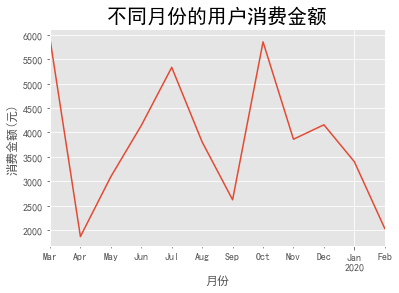

In [8]:
df.groupby('month').order_amount.sum().plot()
plt.xlabel('月份')
plt.ylabel('消费金额(元)')
plt.title('不同月份的用户消费金额',fontsize=20)

分析：按月统计每个月的商品消费金额，可以看到，各月份销量波动起伏较大。

Text(0.5, 1.0, '不同月份的产品购买量')

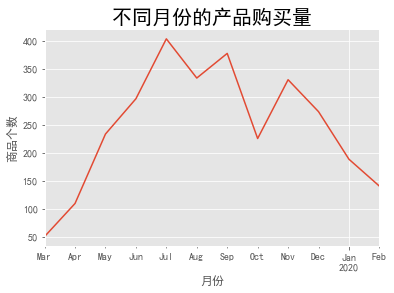

In [9]:
df.groupby('month').order_products.sum().plot()
plt.xlabel('月份')
plt.ylabel('商品个数')
plt.title('不同月份的产品购买量',fontsize=20)

说明：每月的产品购买量呈现前7个月快速上升，后5个月整体下降的趋势。

Text(0.5, 1.0, '不同月份的消费次数')

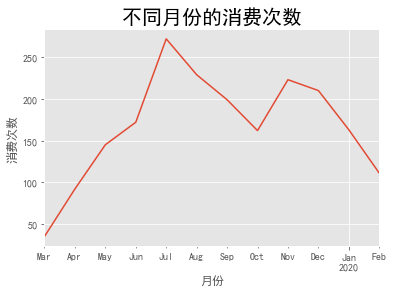

In [10]:
df.groupby('month').user_id.count().plot()
plt.xlabel('月份')
plt.ylabel('消费次数')
plt.title('不同月份的消费次数',fontsize=20)

说明：至7月份消费次数超过250次，后续月份的消费次数开始呈现下降趋势。

Text(0.5, 1.0, '不同月份的消费人数')

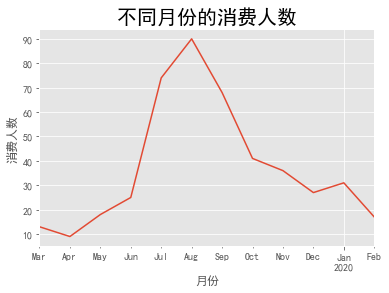

In [11]:
df.groupby('month').user_id.nunique().plot()
plt.xlabel('月份')
plt.ylabel('消费人数')
plt.title('不同月份的消费人数',fontsize=20)

说明：每月的消费人数小于每月的消费次数。至7月份消费人数达90人，后续月份的消费人数开始呈现下降趋势。

# 数据分析-用户个体行为分析

In [12]:
df.groupby('user_id').sum().head()

,order_products,order_amount
user_id,,
vs10000005,9,189
vs10000621,214,5704
vs10000627,2,0
vs10000716,250,2616
vs10000743,1,20


Text(0.5, 1.0, '用户消费金额与产品个数的关系散点图')

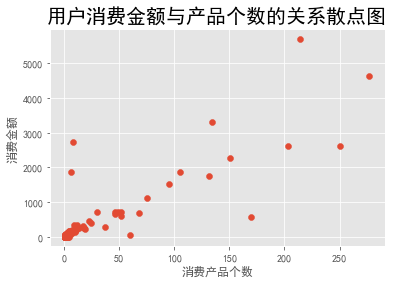

In [13]:
user_consume=df.groupby('user_id').sum()
plt.scatter(user_consume['order_products'], user_consume['order_amount'] ) 
plt.xlabel('消费产品个数')
plt.ylabel('消费金额')
plt.title('用户消费金额与产品个数的关系散点图',fontsize=20)

说明：订单消费金额和订单商品量的关系不呈线性，用户消费规律性不强，订单的极值较多。

Text(0, 0.5, '人数')

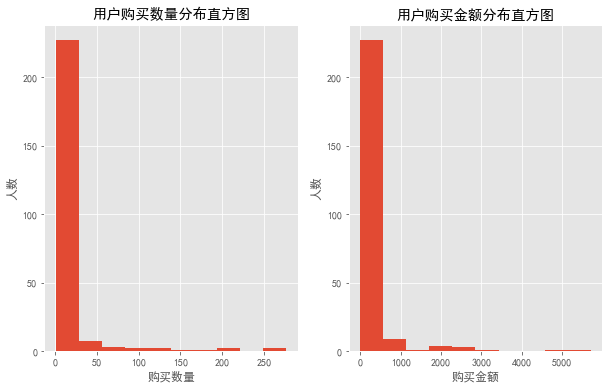

In [14]:
consume_products = user_consume['order_products']
consume_amount= user_consume['order_amount'] 

fig= plt.figure(figsize=(10.,6))
fig.add_subplot(1,2,1)
consume_products.hist(bins=10 )
plt.title('用户购买数量分布直方图')
plt.xlabel('购买数量')
plt.ylabel('人数')
    
fig.add_subplot(1,2,2)
consume_amount.hist(bins=10) 
plt.title('用户购买金额分布直方图')
plt.xlabel('购买金额')
plt.ylabel('人数')

说明：大部分用户消费能力不高，整个计算周期内购买数量在50以内，消费金额在1000以内。

In [15]:
df.groupby('user_id').month.min().value_counts()

2019-08-01    62
2019-07-01    53
2019-09-01    43
2019-10-01    22
2019-11-01    16
2019-03-01    13
2020-01-01    11
2019-06-01     9
2019-05-01     8
2019-12-01     5
2020-02-01     3
2019-04-01     2
Name: month, dtype: int64

Text(0, 0.5, '会员数')

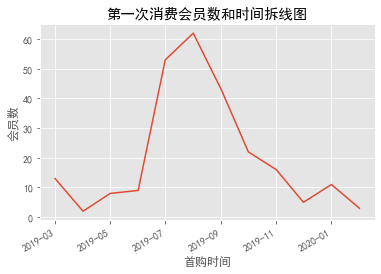

In [16]:
df.groupby('user_id').month.min().value_counts().plot()
plt.title('第一次消费会员数和时间拆线图')
plt.xlabel('首购时间')
plt.ylabel('会员数')

In [17]:
df.groupby('user_id').month.max().value_counts()

2019-08-01    65
2019-09-01    52
2019-07-01    39
2019-10-01    22
2020-01-01    21
2020-02-01    17
2019-11-01    16
2019-12-01     8
2019-03-01     3
2019-06-01     3
2019-05-01     1
Name: month, dtype: int64

Text(0, 0.5, '会员数')

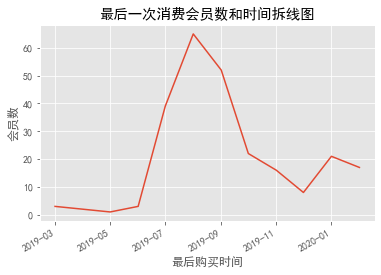

In [18]:
df.groupby('user_id').month.max().value_counts().plot()
plt.title('最后一次消费会员数和时间拆线图')
plt.xlabel('最后购买时间')
plt.ylabel('会员数')

In [22]:
#各会员首次、最后一次消费时间间隔
(df.groupby('user_id')['month'].agg([('num1','min'), ('num2','max')]).num2-df.groupby('user_id')['month'].agg([('num1','min'), ('num2','max')]).num1).value_counts()


0 days      177
31 days      24
61 days       6
92 days       6
122 days      6
337 days      5
30 days       4
306 days      3
153 days      3
184 days      3
62 days       2
123 days      2
215 days      2
245 days      2
275 days      1
276 days      1
dtype: int64

说明：
1.用groupby函数将用户分组，并且求月份的最小值、最小值即用户消费行为的第一次消费时间。
2.大部分用户的第一次消费集中在7、8月份，观察用户的最后一次消费时间，将近80%的客户都在首次消费1个月内流失。

# 数据分析-用户行为中的复购率和回购率分析

## 数据透视-每位会员各月消费次数

In [23]:
#统计用户消费次数
pivoted_counts=df.pivot_table(index='user_id',columns='month',values='order_dt',aggfunc='count').fillna(0)
columns_month=df.month.dt.date.sort_values().unique()
pivoted_counts.columns=columns_month
pivoted_counts.head()

,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
user_id,,,,,,,,,,,,
vs10000005,2.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
vs10000621,6.00,17.00,19.00,20.00,17.00,5.00,2.00,18.00,18.00,21.00,16.00,10.00
vs10000627,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
vs10000716,0.00,0.00,0.00,0.00,14.00,19.00,24.00,12.00,30.00,15.00,12.00,5.00
vs10000743,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


##  复购率分析

In [24]:
#复购率的定义是在某时间窗口内消费两次及以上的用户在总消费用户中占比。这里的时间窗口是月，如果一个用户在同一天下了两笔订单，这里也将他算作复购用户。
#消费两次及以上记为1，消费一次记为0，没有消费记为NaN。
pivoted_counts.transf=pivoted_counts.applymap(lambda x:1 if x>1 else np.NaN if x==0 else 0)
pivoted_counts.transf.head()

C:\Users\wsxia\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
user_id,,,,,,,,,,,,
vs10000005,1.00,nan,1.00,nan,nan,nan,nan,nan,nan,0.00,nan,nan
vs10000621,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
vs10000627,nan,nan,nan,nan,1.00,nan,nan,nan,nan,nan,nan,nan
vs10000716,nan,nan,nan,nan,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
vs10000743,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


Text(0, 0.5, '百分比')

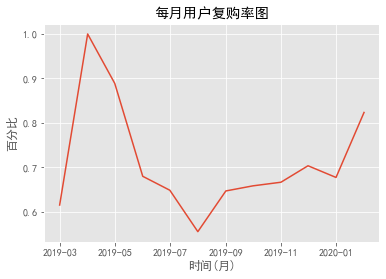

In [25]:
month_counts_reorder_rate=pivoted_counts.transf.sum()/pivoted_counts.transf.count()
plt.plot(month_counts_reorder_rate)
plt.title('每月用户复购率图')
plt.xlabel('时间(月)')
plt.ylabel('百分比')

说明：3月至6月新用户加入数量较少，拉高了复购率。在大量新用户加入并流失的8月的复购率较低。而在后期，这时的用户都是大浪淘沙剩下的老客，复购率继续上升。

Text(0, 0.5, '用户数')

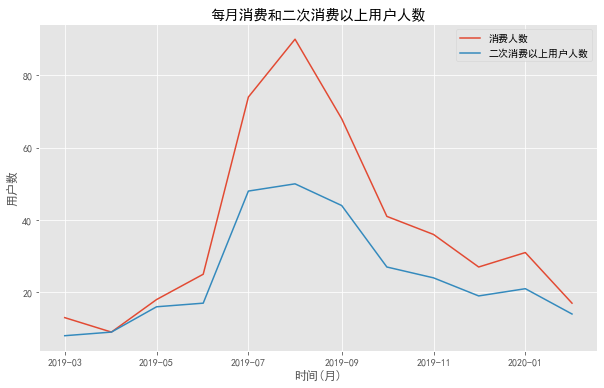

In [26]:
a,b=plt.subplots(figsize=(10,6))
b.plot(pivoted_counts.transf.count())
b.plot(pivoted_counts.transf.sum())
legends=['消费人数','二次消费以上用户人数']
b.legend(legends)
plt.title('每月消费和二次消费以上用户人数')
plt.xlabel('时间(月)')
plt.ylabel('用户数')

## 回购率分析

In [27]:
#回购率是某一个时间窗口内消费的用户，在下一个时间窗口仍旧消费的占比。比如1月消费用户1000，他们中有300个2月依然消费，回购率是30%。
pivoted_amount=df.pivot_table(index='user_id',columns='month',values='order_amount',aggfunc='mean').fillna(0)
columns_month=df.month.dt.date.sort_values().unique()
pivoted_amount.columns=columns_month
pivoted_amount.head()

,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
user_id,,,,,,,,,,,,
vs10000005,25.00,0.00,19.67,0.00,0.00,0.00,0.00,0.00,0.00,80.00,0.00,0.00
vs10000621,414.00,20.00,20.00,20.00,17.65,20.00,20.00,20.00,20.00,20.00,20.00,20.00
vs10000627,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
vs10000716,0.00,0.00,0.00,0.00,20.00,41.84,10.83,15.00,15.33,20.00,20.00,20.20
vs10000743,20.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [28]:
#统计会员用户是否回购
pivoted_purchase=pivoted_amount.applymap(lambda x:1 if x>1 else 0)
pivoted_purchase.head()

,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
user_id,,,,,,,,,,,,
vs10000005,1,0,1,0,0,0,0,0,0,1,0,0
vs10000621,1,1,1,1,1,1,1,1,1,1,1,1
vs10000627,0,0,0,0,0,0,0,0,0,0,0,0
vs10000716,0,0,0,0,1,1,1,1,1,1,1,1
vs10000743,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
def purchase_return(data):
         status = []
         for i in range(11):
             if data[i] >= 1:
                 if data[i + 1] >= 1:
                     status.append(1)
                 else:
                     status.append(0)
             else:
                 status.append(np.NaN)
         status.append(np.NaN)
         return pd.Series(status)

In [30]:
pivoted_purchase_return = pivoted_purchase.apply(purchase_return,axis=1)
pivoted_purchase_return.columns=columns_month
pivoted_purchase_return .head()

,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
user_id,,,,,,,,,,,,
vs10000005,0.00,nan,0.00,nan,nan,nan,nan,nan,nan,0.00,nan,nan
vs10000621,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,nan
vs10000627,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
vs10000716,nan,nan,nan,nan,1.00,1.00,1.00,1.00,1.00,1.00,1.00,nan
vs10000743,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


(array([737119., 737150., 737180., 737211., 737241., 737272., 737303.,
        737333., 737364., 737394., 737425.]),
 <a list of 11 Text xticklabel objects>)

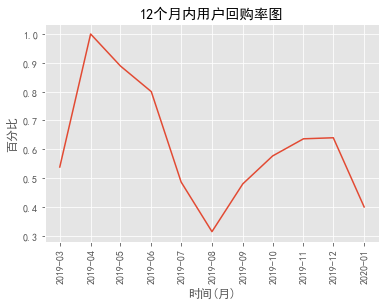

In [31]:
pivoted_purchase_return_rate=pivoted_purchase_return.sum()/pivoted_purchase_return.count()
plt.plot(pivoted_purchase_return_rate)
plt.title('12个月内用户回购率图')
plt.xlabel('时间(月)')
plt.ylabel('百分比')
plt.xticks(rotation=90)

Text(0, 0.5, '用户数')

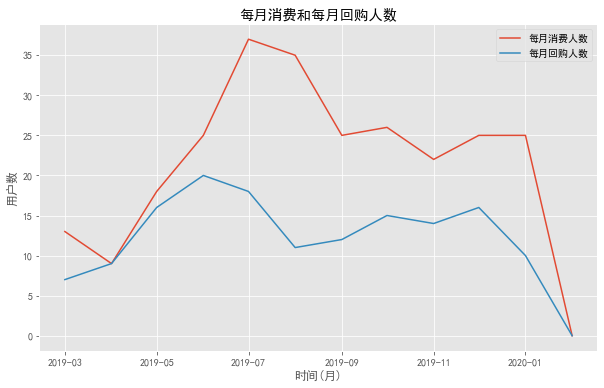

In [32]:
a,b=plt.subplots(figsize=(10,6))
b.plot(pivoted_purchase_return.count())
b.plot(pivoted_purchase_return.sum())
legends=['每月消费人数','每月回购人数']
b.legend(legends)
plt.title('每月消费和每月回购人数')
plt.xlabel('时间(月)')
plt.ylabel('用户数')

Text(0, 0.5, '百分比')

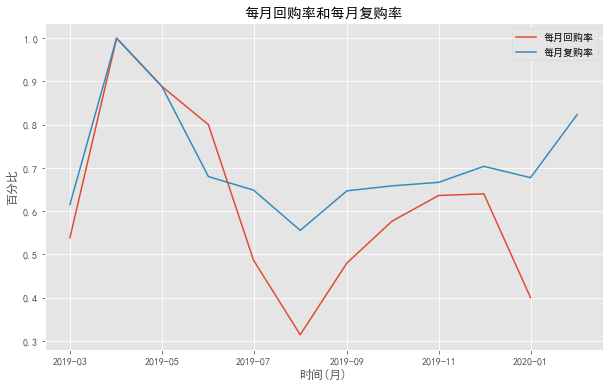

In [33]:
a,b=plt.subplots(figsize=(10,6))
b.plot(pivoted_purchase_return_rate)
b.plot(month_counts_reorder_rate)
legends=['每月回购率','每月复购率']
b.legend(legends)
plt.title('每月回购率和每月复购率')
plt.xlabel('时间(月)')
plt.ylabel('百分比')

说明：大体上，每月用户的复购率高于回购率，波动性也较强。新用户的回购率在30%左右，和老客差异不大。

# 数据分析-用户行为中层分析

## RFM分层

In [34]:
user_rfm=df.pivot_table(index='user_id',values=['order_dt','order_products','order_amount'],aggfunc={'order_dt':'max','order_products':'count','order_amount':'sum'})
user_rfm.head()

,order_amount,order_dt,order_products
user_id,,,
vs10000005,189,2019-12-27,6
vs10000621,5704,2020-02-28,169
vs10000627,0,2019-07-23,2
vs10000716,2616,2020-02-28,131
vs10000743,20,2019-03-15,1


In [35]:
user_rfm['period']=(user_rfm.order_dt.max()-user_rfm.order_dt)/np.timedelta64(1,'D')
user_rfm=user_rfm.rename(columns={'period':'R','order_products':'F','order_amount':'M'})
user_rfm.head()

,M,order_dt,F,R
user_id,,,,
vs10000005,189,2019-12-27,6,63.00
vs10000621,5704,2020-02-28,169,0.00
vs10000627,0,2019-07-23,2,220.00
vs10000716,2616,2020-02-28,131,0.00
vs10000743,20,2019-03-15,1,350.00


In [36]:
#定义分层函数
def rfm_func(x):
    level=x.apply(lambda x:'1' if x>=0 else '0')
    label=level.R+level.F+level.M
    d={'111':'高价值客户','011':'重点保持客户',
       '101':'重点发展客户','001':'重点挽留客户',
      '110':'一般价值客户','010':'一般保持客户',
     '100':'一般发展客户','000':'潜在客户'}
    result=d[label]
    return result
user_rfm['label']=user_rfm[['R','F','M']].apply( lambda x:x-x.mean()).apply(rfm_func,axis=1)
user_rfm.head()

,M,order_dt,F,R,label
user_id,,,,,
vs10000005,189,2019-12-27,6,63.00,重点挽留客户
vs10000621,5704,2020-02-28,169,0.00,重点保持客户
vs10000627,0,2019-07-23,2,220.00,一般发展客户
vs10000716,2616,2020-02-28,131,0.00,重点保持客户
vs10000743,20,2019-03-15,1,350.00,一般发展客户


In [37]:
user_rfm.groupby('label').count()

,M,order_dt,F,R
label,,,,
一般保持客户,3,3,3,3
一般发展客户,146,146,146,146
潜在客户,63,63,63,63
重点保持客户,24,24,24,24
重点发展客户,2,2,2,2
重点挽留客户,2,2,2,2
高价值客户,7,7,7,7


In [38]:
user_rfm.groupby('label').sum()

,M,F,R
label,,,
一般保持客户,352,34,98.00
一般发展客户,2653,272,28793.00
潜在客户,1723,125,6377.00
重点保持客户,32494,1416,846.00
重点发展客户,2091,5,575.00
重点挽留客户,2919,9,165.00
高价值客户,3856,152,1429.00


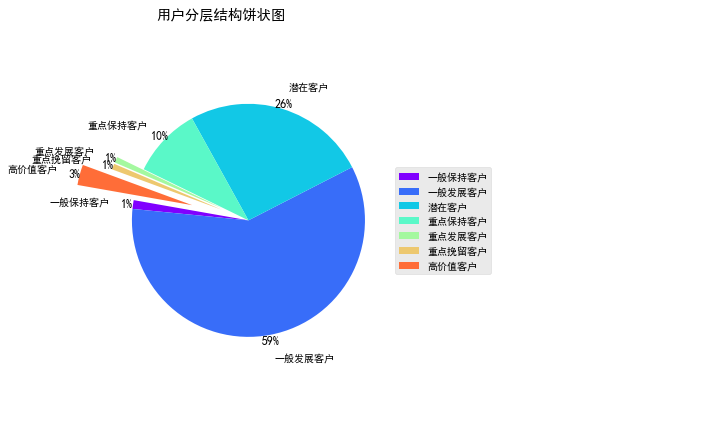

In [39]:
from matplotlib import font_manager as fm #字体管理器
from matplotlib import cm#
proptease = fm.FontProperties()
proptease.set_size('medium')

labelindex =user_rfm.groupby('label').count().index
labelvalues =user_rfm.groupby('label')['M'].count().tolist()
s = pd.Series(labelvalues, index=labelindex )
labels = s.index
sizes = s.values

explode = (0,0,0,0,0.1,0.1,0.2)  # only "explode" the 1st slice
fig, axes = plt.subplots(1,2,figsize=(10,6))
ax1,ax2 = axes.ravel()#结合ravel()函数列出所有子图

colors = cm.rainbow(np.arange(len(sizes))/len(sizes))# # 随机生成颜色
# patches：饼片。texts：分类标签的文本列表。autotexts：百分比部分的文本列表
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.0f%%',explode=explode,
shadow=False, startangle=170, colors=colors, labeldistance=1.2,pctdistance=1.05, radius=0.4)
ax1.axis('equal')#将饼图显示为正圆形
plt.setp(texts, fontproperties=proptease)

# 设置百分比文本样式
for i in autotexts:
    i.set_size('large')
ax1.set_title('用户分层结构饼状图', loc='center')
ax2.axis('off')#关闭所有坐标轴线、刻度标记和标签
ax2.legend(patches, labels, loc='center left',fontsize=10)
plt.tight_layout()#tight_layout会自动调整子图参数，使之填充整个图像区域

分析：从用户分层结果可知，一般发展客户占了较大的比重，为59%，潜在客户排第二位，占比26%。

## 总分层分析

In [40]:
#按照用户的消费行为，简单划分成几个维度：新用户、活跃用户、不活跃用户、回流用户。
#新用户(new)的定义是第一次消费。
#活跃用户(active)即老客，在某一个时间窗口内有过消费。
#不活跃用户(unactive)则是时间窗口内没有消费过的老客。
#回流用户(return)是在上一个窗口中没有消费，而在当前时间窗口内有过消费。
#以上的时间窗口都是按月统计。
def active_status(data):
    status = []
    for i in range(12):
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == 'unreg': #未注册
                    status.append('unreg')
                else:
                    status.append('unactive')
            else:
                status.append('unreg')
          #若本月有消费      
        else:
            if len(status) == 0:
                status.append('new')
            else:
                if status[i-1] == 'unactive':
                    status.append('return')
                elif status[i-1] == 'unreg':
                    status.append('new')
                else:
                    status.append('active')
    return pd.Series(status)
pivoted_purchase_status = pivoted_purchase.apply( lambda x:active_status(x),axis=1)
pivoted_purchase_status.columns=columns_month
pivoted_purchase_status .head()

,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
user_id,,,,,,,,,,,,
vs10000005,new,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive
vs10000621,new,active,active,active,active,active,active,active,active,active,active,active
vs10000627,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg,unreg
vs10000716,unreg,unreg,unreg,unreg,new,active,active,active,active,active,active,active
vs10000743,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [41]:
pivoted_status_counts=pivoted_purchase_status.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
pivoted_status_counts

,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,2019-11-01,2019-12-01,2020-01-01,2020-02-01
active,nan,7.00,9,16.00,20.00,18.00,11,12,15,14,16,10
new,13.00,2.00,8,9.00,17.00,17.00,10,9,6,7,7,1
return,nan,nan,1,nan,nan,nan,4,5,1,4,2,3
unactive,nan,6.00,5,7.00,12.00,31.00,51,59,69,73,80,92


Text(0, 0.5, '用户数')

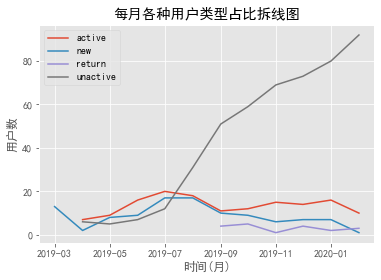

In [42]:
plt.plot(pivoted_status_counts.T)
plt.title('每月各种用户类型占比拆线图')
plt.legend(pivoted_status_counts.index)
plt.xlabel('时间(月)')
plt.ylabel('用户数')

分析：黑色的不活跃用户占了较大的比重。红色的活跃用户较稳定，其与紫色的回流用户相加大抵是本月消费人数。

## 回流用户及活跃用户分析

(array([737150., 737180., 737211., 737241., 737272., 737303., 737333.,
        737364., 737394., 737425., 737456.]),
 <a list of 11 Text xticklabel objects>)

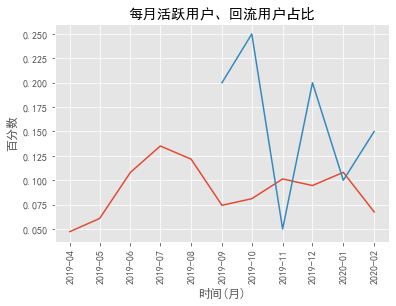

In [43]:
return_rate=pivoted_status_counts.apply(lambda x:x/x.sum(),axis=1)
plt.plot(return_rate.loc[['active','return'],].T)
plt.title('每月活跃用户、回流用户占比')
plt.xlabel('时间(月)')
plt.ylabel('百分数')
plt.xticks(rotation=90)

说明：结合回流用户和活跃用户看，在后期的消费用户中，70%是回流用户，30%是活跃用户，整体质量还好。

# 数据分析-用户质量分析

## 总质量分析

In [44]:
user_amount=df.groupby('user_id').order_amount.sum().sort_values().reset_index()
user_amount['amount_cumsum']=user_amount.order_amount.cumsum()
user_amount.tail()

,user_id,order_amount,amount_cumsum
242,vs10000716,2616,29735
243,vs10000775,2730,32465
244,vs30026748,3296,35761
245,vs30029475,4623,40384
246,vs10000621,5704,46088


Text(0, 0.5, '百分数')

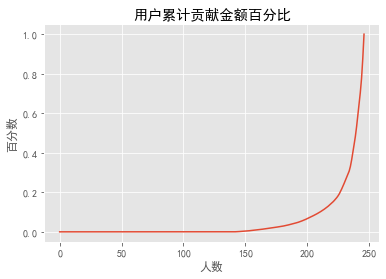

In [45]:
amount_total=user_amount.amount_cumsum.max()
user_amount['prop'] = user_amount.amount_cumsum.apply(lambda x:x/amount_total)
plt.plot(user_amount.prop )
plt.title('用户累计贡献金额百分比')
plt.xlabel('人数')
plt.ylabel('百分数')

说明：此次数据集用户总共247人，可见其中47人(约占总人数的19%)贡献了超过80%的销售金额。

# 数据分析-用户生命周期分析

## 第一生命周期

In [46]:
#各会员首次、最后一次消费时间间隔
order_dt_min=df.groupby('user_id').order_dt.min()
order_dt_max=df.groupby('user_id').order_dt.max()
life_time=(order_dt_max-order_dt_min).reset_index()
life_time.head()

,user_id,order_dt
0,vs10000005,273 days
1,vs10000621,351 days
2,vs10000627,1 days
3,vs10000716,238 days
4,vs10000743,0 days


In [47]:
life_time.describe()

,order_dt
count,247
mean,32 days 03:59:01.700404
std,73 days 19:15:10.251372
min,0 days 00:00:00
25%,0 days 00:00:00
50%,1 days 00:00:00
75%,13 days 00:00:00
max,351 days 00:00:00


分析：由描述可知，所有用户的平均生命周期是32天，中位数是1天，即存在50%的客户首次消费即最后一次消费。
最大值351天，即本数据集的总天数，说明存在从开始到最后都消费的高质量用户。

Text(0, 0.5, '人数')

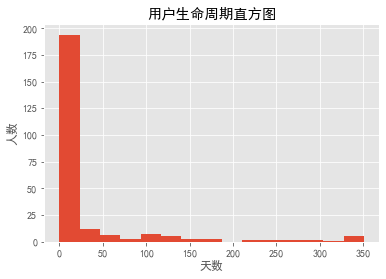

In [48]:
((order_dt_max-order_dt_min)/np.timedelta64(1,'D')).hist(bins=15)
plt.title('用户生命周期直方图')
plt.xlabel('天数')
plt.ylabel('人数')

## 消费两次以上的用户生命周期

Text(0, 0.5, '人数')

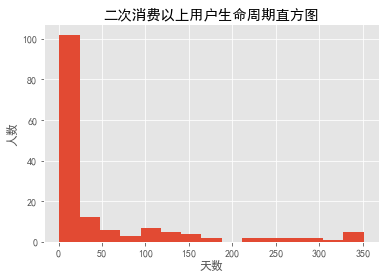

In [49]:
life_time['life_time']=life_time.order_dt/np.timedelta64(1,'D')
life_time[life_time.life_time>0].life_time.hist(bins=15)#排除仅消费一次的客户
plt.title('二次消费以上用户生命周期直方图')
plt.xlabel('天数')
plt.ylabel('人数')

In [50]:
life_time[life_time.life_time>0].life_time.describe()

count   155.00
mean     51.26
std      87.84
min       1.00
25%       2.00
50%       7.00
75%      53.50
max     351.00
Name: life_time, dtype: float64

分析：二次消费以上用户生命周期为51天，略高于总体。从策略上看，用户首次消费后应该引导其再次消费。

# 数据分析-用户留存率分析

In [51]:
#留存率指用户在第一次消费后，有多少比率进行第二次消费。和回流率的区别是留存倾向于计算第一次消费，并且有多个时间窗口。
user_purchase_retention=pd.merge(left=df,right=order_dt_min.reset_index(),how='inner',on='user_id',suffixes=('','_min'))
user_purchase_retention['date_diff']=(user_purchase_retention.order_dt-user_purchase_retention.order_dt_min)/np.timedelta64(1,'D')
bin=[0,30,60,90,120,150,180,365]
user_purchase_retention['date_diff_bin']=pd.cut(user_purchase_retention['date_diff'],bins=bin)
user_purchase_retention.head(10)

,user_id,order_dt,order_products,order_amount,month,order_dt_min,date_diff,date_diff_bin
0,vs30033073,2020-01-17,1,20,2020-01-01,2019-09-23,116.00,"(90, 120]"
1,vs30033073,2019-11-29,2,20,2019-11-01,2019-09-23,67.00,"(60, 90]"
2,vs30033073,2019-11-13,2,20,2019-11-01,2019-09-23,51.00,"(30, 60]"
3,vs30033073,2019-12-24,2,20,2019-12-01,2019-09-23,92.00,"(90, 120]"
4,vs30033073,2019-10-29,2,20,2019-10-01,2019-09-23,36.00,"(30, 60]"
5,vs30033073,2020-01-07,2,20,2020-01-01,2019-09-23,106.00,"(90, 120]"
6,vs30033073,2019-12-09,2,20,2019-12-01,2019-09-23,77.00,"(60, 90]"
7,vs30033073,2020-01-06,1,20,2020-01-01,2019-09-23,105.00,"(90, 120]"
8,vs30033073,2019-11-01,2,20,2019-11-01,2019-09-23,39.00,"(30, 60]"
9,vs30033073,2019-10-21,2,20,2019-10-01,2019-09-23,28.00,"(0, 30]"


In [52]:
pivoted_retention=user_purchase_retention.pivot_table(index='user_id',columns='date_diff_bin',values='order_amount',aggfunc=sum,dropna=False)
pivoted_retention.head()

date_diff_bin,"(0, 30]","(30, 60]","(60, 90]","(90, 120]","(120, 150]","(150, 180]","(180, 365]"
user_id,,,,,,,
vs10000005,nan,59.00,nan,nan,nan,nan,80.00
vs10000621,240.00,300.00,420.00,400.00,200.00,40.00,1700.00
vs10000627,0.00,nan,nan,nan,nan,nan,nan
vs10000716,280.00,795.00,240.00,220.00,440.00,280.00,341.00
vs10000743,nan,nan,nan,nan,nan,nan,nan


In [53]:
pivoted_retention.mean()

date_diff_bin
(0, 30]       52.70
(30, 60]     148.62
(60, 90]     171.52
(90, 120]    307.59
(120, 150]   112.90
(150, 180]   111.60
(180, 365]   700.36
dtype: float64

C:\Users\wsxia\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


Text(0, 0.5, '百分数')

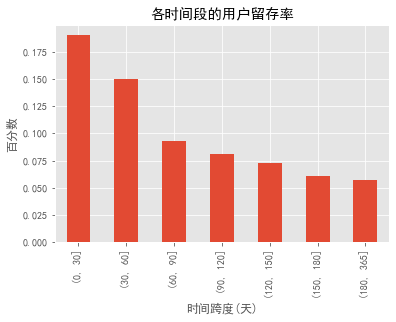

In [54]:
pivoted_retention.transf=pivoted_retention.fillna(0).applymap(lambda x:1 if x>0 else 0)
(pivoted_retention.transf.sum()/pivoted_retention.transf.count()).plot.bar()
plt.title('各时间段的用户留存率')
plt.xlabel('时间跨度(天)')
plt.ylabel('百分数')

分析：第一个月的留存率约超过17.5%,第二个月下降至15%,之后几个月稳定在6%左右，说明后面几个月流失率较大 。

# 数据分析-决策分析

In [55]:
#平均购买周期：用户两次消费行为的时间间隔。
def diff(group):
    d=group.date_diff.shift(-1)-group.date_diff
    return d
last_diff=user_purchase_retention.sort_values("order_dt").reset_index().groupby('user_id').apply(diff)
last_diff.head(10)

user_id         
vs10000005  31       0.00
            34      42.00
            158      1.00
            160      0.00
            161    230.00
            1715      nan
vs10000621  2        0.00
            3       11.00
            22       1.00
            26       1.00
Name: date_diff, dtype: float64

In [56]:
last_diff.describe()

count   1766.00
mean       4.50
std       14.03
min        0.00
25%        1.00
50%        1.00
75%        4.00
max      230.00
Name: date_diff, dtype: float64

说明：可知用户的平均消费间隔时间是4.5天。想要召回用户，在4.5天左右的消费间隔是比较好的。

Text(0, 0.5, '百分数')

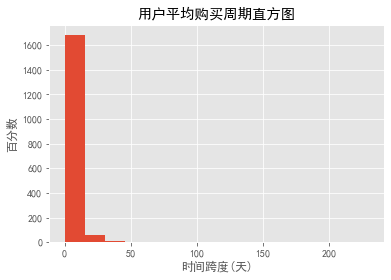

In [57]:
last_diff.hist(bins=15)
plt.title('用户平均购买周期直方图')
plt.xlabel('时间跨度(天)')
plt.ylabel('百分数')

说明：典型的长尾分布，大部分用户的消费间隔比较短。